# 1. Предобработка


Выберите набор данных из списка в конце задания. Обработайте данные в нём:

1. Обработайте недостающие данные в датасете - удалить/заменить/etc, обоснуйте своё решение
1. Постройте как минимум по 1 графику каждого типа из представленных на лекции. Для каждого построенного графика объясните почему отображённые данные лучше всего представимы именно этим типом графика
1. Сохраните датасет


1. Создайте новую колонку, отображающую характеристику набора данных. Новая колонка должна обладать смысловой нагрузкой. 

    Например, для набора данных о прямоугольниках с двумя колонками width и height будет корректно придумать колонку square, равную width * height или perimeter Некорректно будет придумать колонку width2, равную width * 2, потому что эта информация не будет нести полезную информацию о фигурах

Не оценивается баллами, но даёт очки уважения:
1. Выдвиньте 2 гипотезы о данных. Например, для датасета codeforces достаточно интересной гипотезой может быть "простые задачи (рейтинг меньше 1500) почти всегда решаются больше 5000 раз"


Наборы данных:

1. [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) - характеристики треков в spotify
1. [VKontakte Dataset of Users' Textual Data](https://www.kaggle.com/oldaandozerskaya/vkontakte-dataset-of-users-textual-data) 1. основная информация 10к профилей ВК
1. [Data Science for COVID-19](https://www.kaggle.com/kimjihoo/coronavirusdataset) - информация о распространении коронавируса в Южной Корее в 2020 году
1. [Dota 2 - Pro Players Matches Results 2019 ~ 2021](https://www.kaggle.com/devinanzelmo/dota-2-matches?select=player_ratings.csv) - информация матчей игроков DoTA 2. Если данные не влезают в память, можно воспользоваться [аналогом pandas](https://dask.org/) для обработки вне RAM
1. [GPS Data of Seabirds](https://www.kaggle.com/saurabhshahane/predicting-animal-behavior-using-gps) - данные о миграции птиц
1. [FAANG Historical Stock Price Data](https://www.kaggle.com/specter7/amazon-amzn-historical-stock-price-data) -  данные о биржевых котировках компаний FAANG c 2016 по 2021 год
1. [NBA 2k20 player dataset](https://www.kaggle.com/isaienkov/nba2k20-player-dataset) - информация об игроках NBA
1. [Anime dataset](https://www.kaggle.com/thunderz/anime-dataset?select=user_data.csv) - данные о просмотре аниме пользователями с сайта myAnimeList

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.__version__

'1.21.2'

In [3]:
ani_data = pd.read_csv('data/anime_data.csv', parse_dates = [1, 2])
ani_data.head(5)

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,status,studios,synopsis,title,title_english,type
0,1,1998-04-03 00:00:00+00:00,1999-04-24 00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,"[{'mal_id': 14, 'name': 'Sunrise'}]","In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV
1,100,2001-04-04 00:00:00+00:00,2001-06-27 00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]","Due to her father's remarriage, robust 16-year...",Shin Shirayuki-hime Densetsu Prétear,Prétear: The New Legend of Snow White,TV
2,1000,1978-03-14 00:00:00+00:00,1979-02-13 00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,PG-13 - Teens 13 or older,7.71,7059,Manga,Finished Airing,"[{'mal_id': 18, 'name': 'Toei Animation'}]",It is 2977 AD and mankind has become stagnant....,Uchuu Kaizoku Captain Herlock,Space Pirate Captain Harlock,TV
3,10003,2008-01-01 00:00:00+00:00,NaT,2 min per ep,15,"['Comedy', 'Dementia', 'Horror', 'Seinen']",6848,NaN,10146.0,R+ - Mild Nudity,5.05,1181,Original,Finished Airing,[],"In these jokey short films, many of them crude...",Kago Shintarou Anime Sakuhin Shuu,NaN,OVA
4,10005,2007-03-31 00:00:00+00:00,NaT,1 hr 35 min,1,"['Action', 'Adventure', 'Mecha', 'Sci-Fi']",10765,NaN,6121.0,G - All Ages,6.43,228,Unknown,Finished Airing,"[{'mal_id': 455, 'name': 'Palm Studio'}]",This theatrical version based on the manga by ...,Tetsujin 28-gou: Hakuchuu no Zangetsu,NaN,Movie


In [4]:
# convert date strings to dates in yyyy-mm-dd format
ani_data['aired_from'] = pd.to_datetime(ani_data['aired_from'].dt.date)
ani_data['aired_to'] = pd.to_datetime(ani_data['aired_to'].dt.date)

In [5]:
# drop animes, which release dates we do not know
ani_data.dropna(subset=['aired_from', 'rank'], inplace = True)
# if aired_to is NaN, this anime was aired in one day
ani_data['aired_to'].fillna(ani_data['aired_from'], inplace=True)

In [6]:
# helper function to translate quarter to season
quarter_to_season = {1 : 'Winter', 2 : 'Spring', 3 : 'Summer', 4 : 'Fall'}

# fill premiered with corresponding air time transformed to match existing format
ani_data['premiered'].fillna(\
                    ani_data['aired_from'].transform(\
                    lambda d: quarter_to_season[d.quarter] + ' ' + str(d.year)), inplace=True)

In [7]:
# we cannot replace synopsis, if there is none. Not that we really need to do that
ani_data['synopsis'].fillna("", inplace = True)
# not having a localized title is a common practice
ani_data['title_english'].fillna(ani_data['title'], inplace = True)

In [8]:
ani_data.info()
ani_data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10048 entries, 0 to 11334
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   mal_id         10048 non-null  int64         
 1   aired_from     10048 non-null  datetime64[ns]
 2   aired_to       10048 non-null  datetime64[ns]
 3   duration       10048 non-null  object        
 4   episodes       10048 non-null  int64         
 5   genres         10048 non-null  object        
 6   popularity     10048 non-null  int64         
 7   premiered      10048 non-null  object        
 8   rank           10048 non-null  float64       
 9   rating         10048 non-null  object        
 10  score          10048 non-null  float64       
 11  scored_by      10048 non-null  int64         
 12  source         10048 non-null  object        
 13  status         10048 non-null  object        
 14  studios        10048 non-null  object        
 15  synopsis       1004

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,status,studios,synopsis,title,title_english,type
0,1,1998-04-03,1999-04-24,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,"[{'mal_id': 14, 'name': 'Sunrise'}]","In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV
1,100,2001-04-04,2001-06-27,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]","Due to her father's remarriage, robust 16-year...",Shin Shirayuki-hime Densetsu Prétear,Prétear: The New Legend of Snow White,TV
2,1000,1978-03-14,1979-02-13,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,PG-13 - Teens 13 or older,7.71,7059,Manga,Finished Airing,"[{'mal_id': 18, 'name': 'Toei Animation'}]",It is 2977 AD and mankind has become stagnant....,Uchuu Kaizoku Captain Herlock,Space Pirate Captain Harlock,TV
3,10003,2008-01-01,2008-01-01,2 min per ep,15,"['Comedy', 'Dementia', 'Horror', 'Seinen']",6848,Winter 2008,10146.0,R+ - Mild Nudity,5.05,1181,Original,Finished Airing,[],"In these jokey short films, many of them crude...",Kago Shintarou Anime Sakuhin Shuu,Kago Shintarou Anime Sakuhin Shuu,OVA
4,10005,2007-03-31,2007-03-31,1 hr 35 min,1,"['Action', 'Adventure', 'Mecha', 'Sci-Fi']",10765,Winter 2007,6121.0,G - All Ages,6.43,228,Unknown,Finished Airing,"[{'mal_id': 455, 'name': 'Palm Studio'}]",This theatrical version based on the manga by ...,Tetsujin 28-gou: Hakuchuu no Zangetsu,Tetsujin 28-gou: Hakuchuu no Zangetsu,Movie


In [9]:
ani_data.to_csv('data/anime_data_preprocessed.csv')

In [10]:
plt.rcParams['figure.figsize'] = (20, 10)

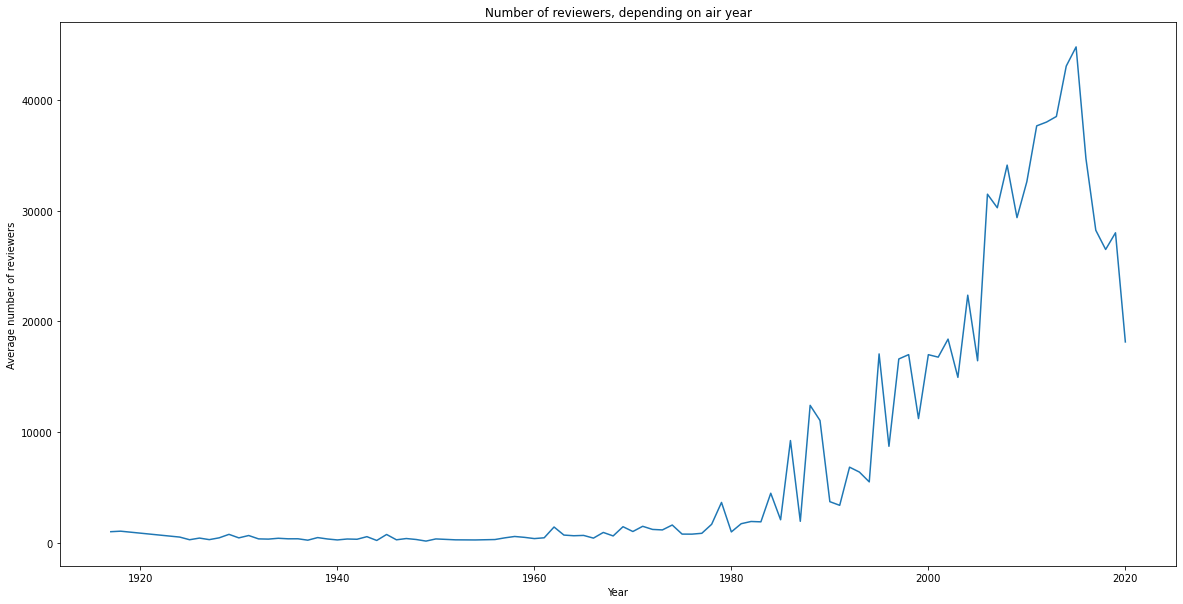

In [11]:
# simple plot
grouped_by_aired = ani_data.groupby(ani_data['aired_from'].dt.year)

plt.plot(grouped_by_aired['scored_by'].mean())
plt.title('Number of reviewers, depending on air year')
plt.xlabel('Year')
plt.ylabel('Average number of reviewers')
plt.show()

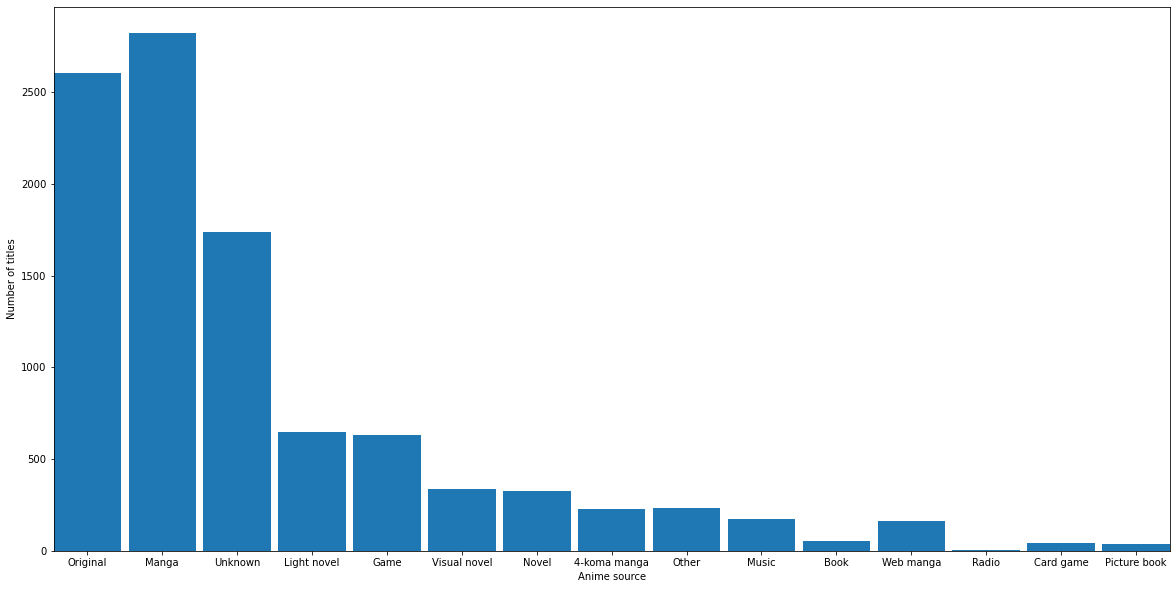

In [12]:
# histogram
plt.hist(ani_data.source, bins = ani_data.source.nunique() - 1, align = 'left', rwidth = 0.9)
plt.xticks(range(ani_data.source.nunique()))
plt.xlabel('Anime source')
plt.ylabel('Number of titles')
plt.autoscale(enable = True, axis = 'x', tight = True)
plt.show()

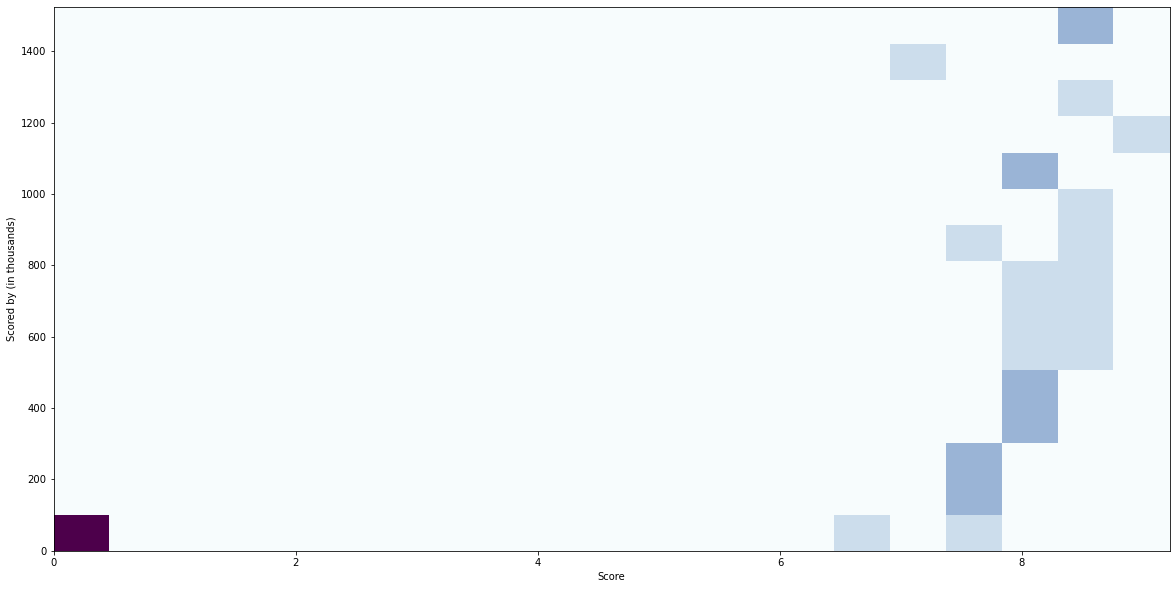

In [13]:
# 2d-histogtam
grouped_by_scored = ani_data.groupby(pd.cut(ani_data['scored_by'], np.arange(0, 1600000, 50000))).median().fillna(0)
plt.hist2d(grouped_by_scored['score'], grouped_by_scored['scored_by'].apply(lambda x: x // 1000),
           bins = (20, 15),
           cmap = plt.cm.BuPu
           )
plt.xlabel('Score')
plt.ylabel('Scored by (in thousands)')
plt.show()

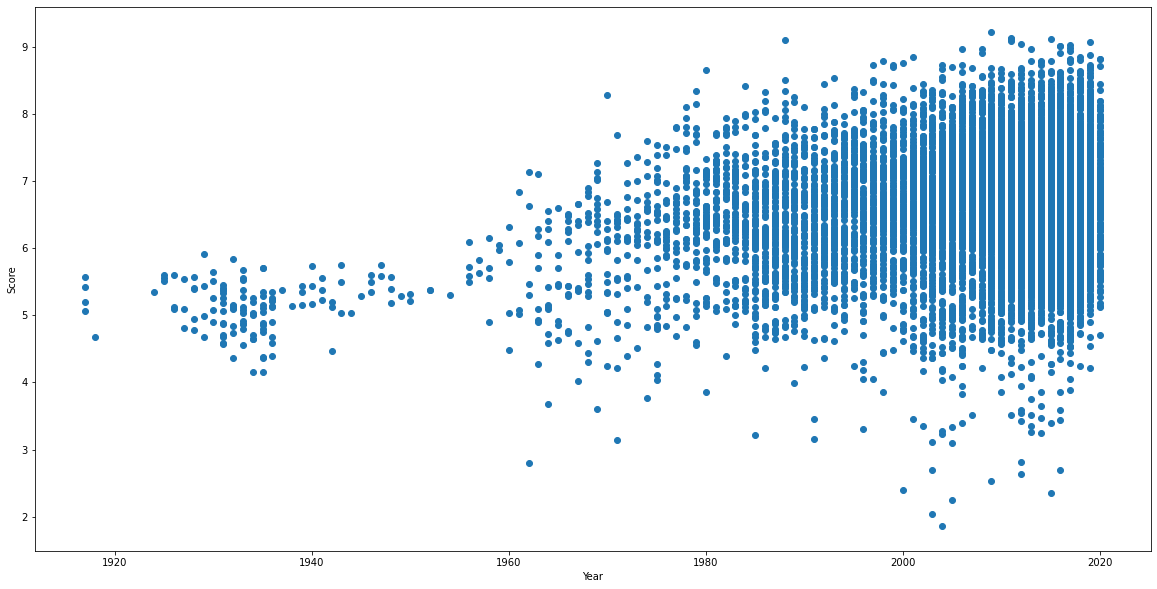

In [14]:
# Sparse
plt.scatter(ani_data['aired_from'].dt.year, ani_data['score'])
plt.xlabel('Year')
plt.ylabel('Score')
plt.show()

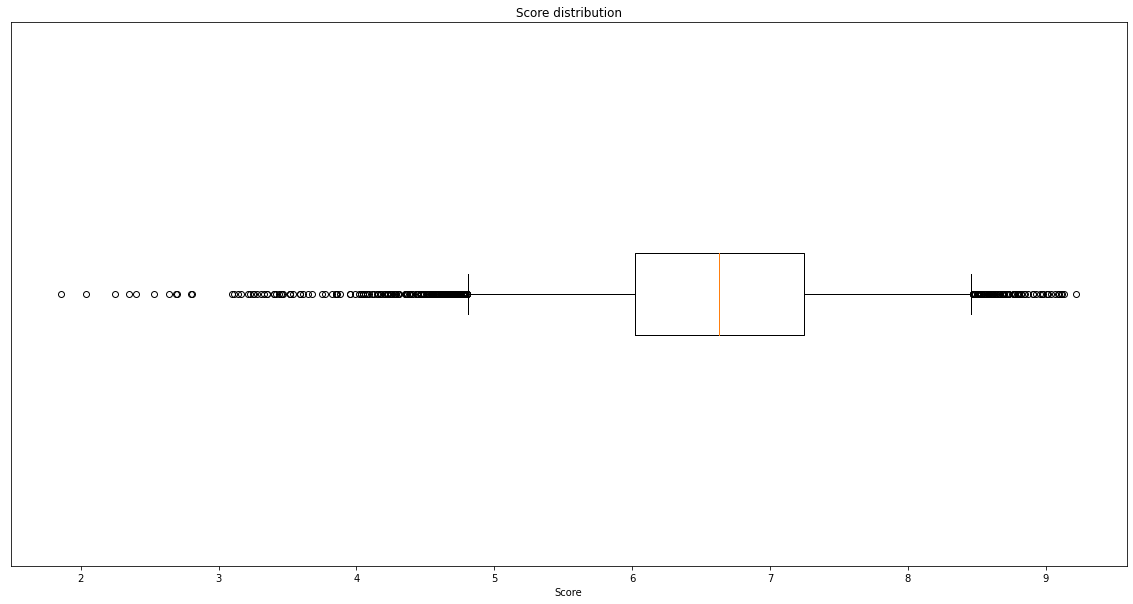

In [15]:
# Boxplot: score distribution
plt.boxplot(ani_data['score'],
            vert = False, 
            whis = 0.99)
plt.yticks([])
plt.title('Score distribution')
plt.xlabel('Score')
plt.show()

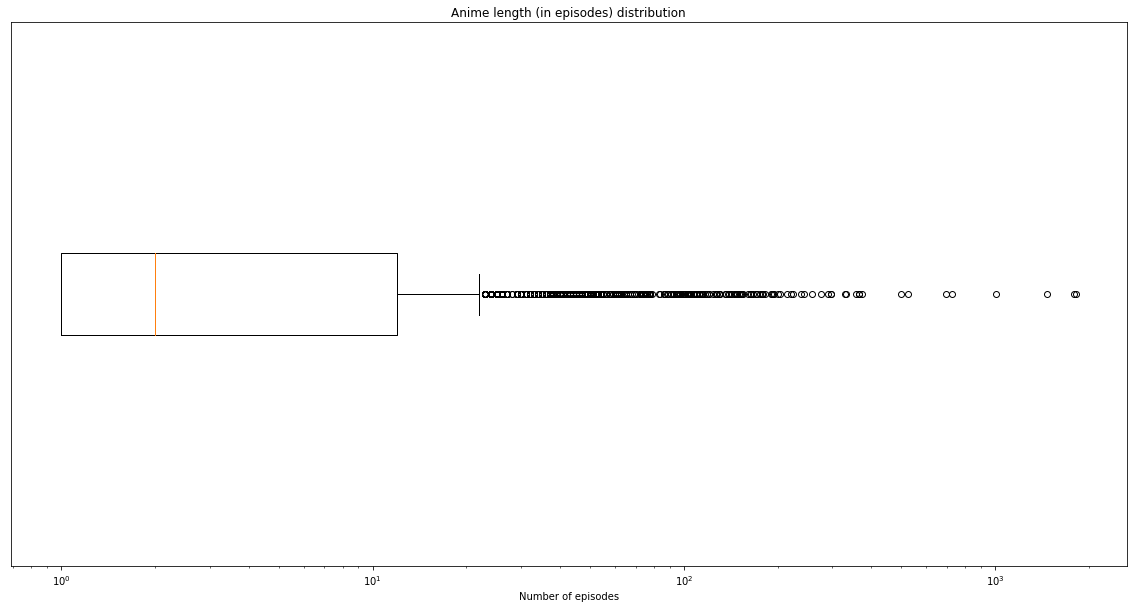

In [16]:
# Boxplot: number of episodes distribution
plt.boxplot(ani_data['episodes'],
            vert = False, 
            whis = 0.95)
plt.yticks([])
plt.title('Anime length (in episodes) distribution')
plt.xlabel('Number of episodes')
plt.xscale('log')
plt.show()

In [17]:
def convert_to_minutes(dur: str) -> int:
    if (dur.find('per ep') != -1):
        return int(dur.split()[0])
    else:
        h = '0'
        if (dur.find('hr') != -1):
            h, _, dur = dur.partition('hr')
        m, delim, _ = dur.partition('min')
        if (len(delim) == 0):
            m = '0'
        return int(h) * 60 + int(m)

ani_data.insert(5, 'total_duration',\
               (ani_data.duration.apply(convert_to_minutes) * ani_data.episodes))#.apply(lambda dur: str(dur) + ' min'))

In [18]:
ani_data.info()
ani_data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10048 entries, 0 to 11334
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mal_id          10048 non-null  int64         
 1   aired_from      10048 non-null  datetime64[ns]
 2   aired_to        10048 non-null  datetime64[ns]
 3   duration        10048 non-null  object        
 4   episodes        10048 non-null  int64         
 5   total_duration  10048 non-null  int64         
 6   genres          10048 non-null  object        
 7   popularity      10048 non-null  int64         
 8   premiered       10048 non-null  object        
 9   rank            10048 non-null  float64       
 10  rating          10048 non-null  object        
 11  score           10048 non-null  float64       
 12  scored_by       10048 non-null  int64         
 13  source          10048 non-null  object        
 14  status          10048 non-null  object        
 15  st

,mal_id,aired_from,aired_to,duration,episodes,total_duration,genres,popularity,premiered,rank,rating,score,scored_by,source,status,studios,synopsis,title,title_english,type
0,1,1998-04-03,1999-04-24,24 min per ep,26,624,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,"[{'mal_id': 14, 'name': 'Sunrise'}]","In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV
1,100,2001-04-04,2001-06-27,23 min per ep,13,299,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]","Due to her father's remarriage, robust 16-year...",Shin Shirayuki-hime Densetsu Prétear,Prétear: The New Legend of Snow White,TV
2,1000,1978-03-14,1979-02-13,25 min per ep,42,1050,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,PG-13 - Teens 13 or older,7.71,7059,Manga,Finished Airing,"[{'mal_id': 18, 'name': 'Toei Animation'}]",It is 2977 AD and mankind has become stagnant....,Uchuu Kaizoku Captain Herlock,Space Pirate Captain Harlock,TV
3,10003,2008-01-01,2008-01-01,2 min per ep,15,30,"['Comedy', 'Dementia', 'Horror', 'Seinen']",6848,Winter 2008,10146.0,R+ - Mild Nudity,5.05,1181,Original,Finished Airing,[],"In these jokey short films, many of them crude...",Kago Shintarou Anime Sakuhin Shuu,Kago Shintarou Anime Sakuhin Shuu,OVA
4,10005,2007-03-31,2007-03-31,1 hr 35 min,1,95,"['Action', 'Adventure', 'Mecha', 'Sci-Fi']",10765,Winter 2007,6121.0,G - All Ages,6.43,228,Unknown,Finished Airing,"[{'mal_id': 455, 'name': 'Palm Studio'}]",This theatrical version based on the manga by ...,Tetsujin 28-gou: Hakuchuu no Zangetsu,Tetsujin 28-gou: Hakuchuu no Zangetsu,Movie


Гипотеза 1: Аниме с большим количеством оценок обычно имеют score не ниже среднего (>= 6.0)

Гипотеза 2: Длинные (по суммарной длительности) аниме имеют меньшее количество оценивающих (следовательно, зрителей)

# 2. Интерполяция кривой

Сгенерируйте от 5 до 20 точек со случайными разными координатами (x, y), расположите их на координатной плоскости

1. С помощью библиотеки scipy примените один из её [алгоритмов интерполяции](https://docs.scipy.org/doc/scipy/reference/interpolate.html) к сгенерированным данным
1. Изучите математический подход метод выбранного алгоритма интерполяции в scipy. Найдите и продемонстрируйте при сдаче реализацию метода в исходном коде библиотеки scipy. Найти можно в [github репозитории проекта](https://github.com/scipy/scipy)
1. Выберите среди методов интерполяции в scipy любой другой метод интерполяции (кроме линейной интерполяций). Реализуйте выбранный метод без использования сторонних библиотек. Разрешается использовать numpy для упрощения математичеcких вычислений
1. Визуализируйте кривую интерполяции библиотечного и вашего алгоритмов с помощью  matplotlib. Сравните качество интерполяции своего и библиотечного методов, объясните разницу в качестве

In [19]:
from numpy.random import default_rng
import scipy.interpolate as scp_intrp
rng = default_rng(42)

[-23 -22 -19 -18 -11 -10  -4  -3  -1   1   5   6   7   8  11  14  15  16
  21  23]
[  2   0 -23   9  -4   6  -2 -20  -9 -17  -6 -18  16 -13  21  -3  10  12
   1  18]
[-23 -20 -18 -17 -13  -9  -6  -4  -3  -2   0   1   2   6   9  10  12  16
  18  21]


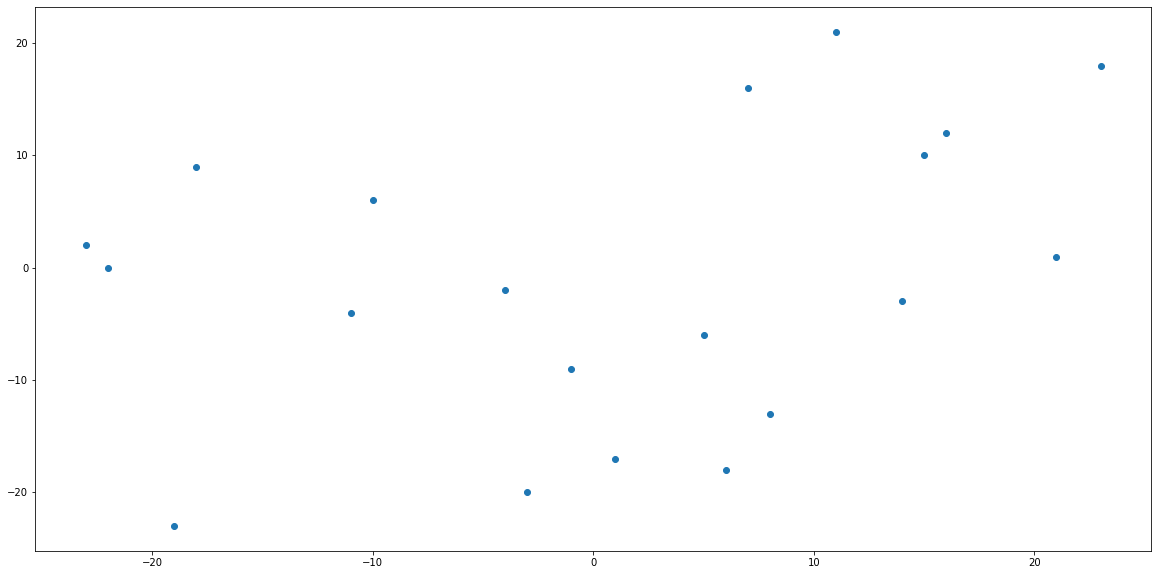

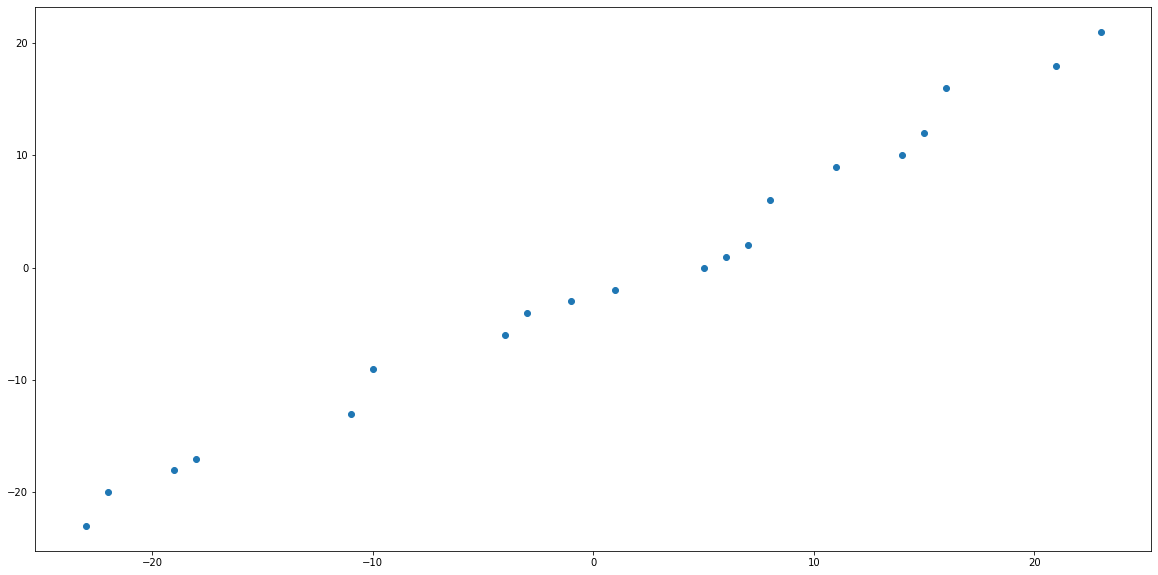

In [20]:
xs = np.sort(rng.choice(50, 20, replace = False) - 25)
ys = rng.choice(50, 20, replace = False) - 25
ys_sorted = np.sort(ys)
print(xs)
print(ys)
print(ys_sorted)
plt.scatter(xs, ys); plt.show()
plt.scatter(xs, ys_sorted); plt.show()

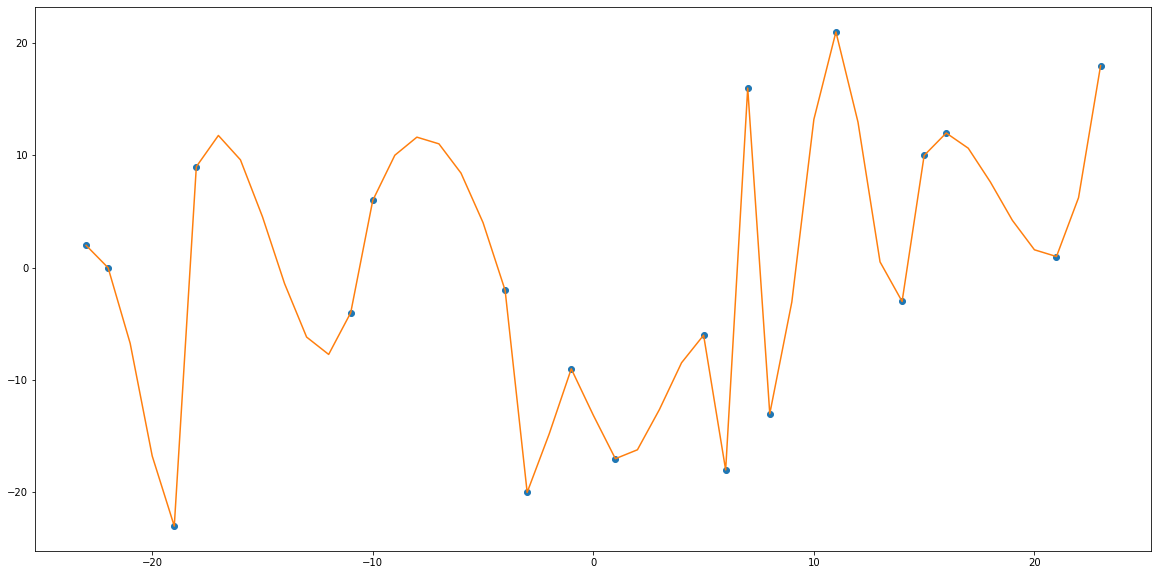

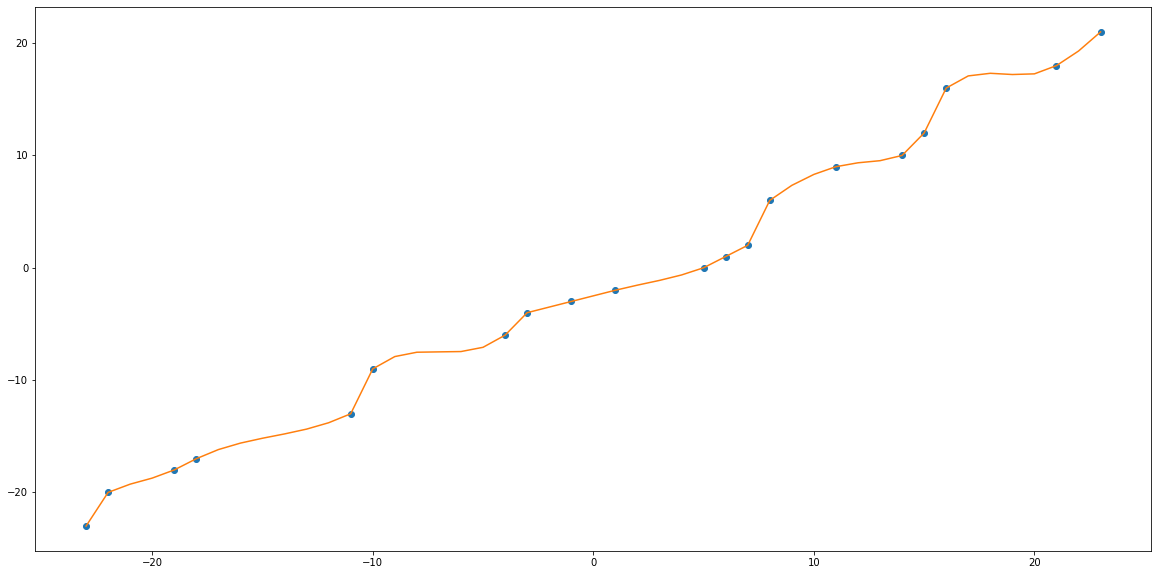

In [21]:
new_xs = np.arange(-25, 25)
f = scp_intrp.Akima1DInterpolator(xs, ys)
f2 = scp_intrp.Akima1DInterpolator(xs, ys_sorted)
#f3 = scp_intrp.interp1d(xs, ys_sorted, kind = 'linear')
plt.plot(xs, ys, 'o', new_xs, f(new_xs), '-'); plt.show()
plt.plot(xs, ys_sorted, 'o', new_xs, f2(new_xs), '-'); plt.show()
#plt.plot(new_xs, f3(new_xs)); plt.show()

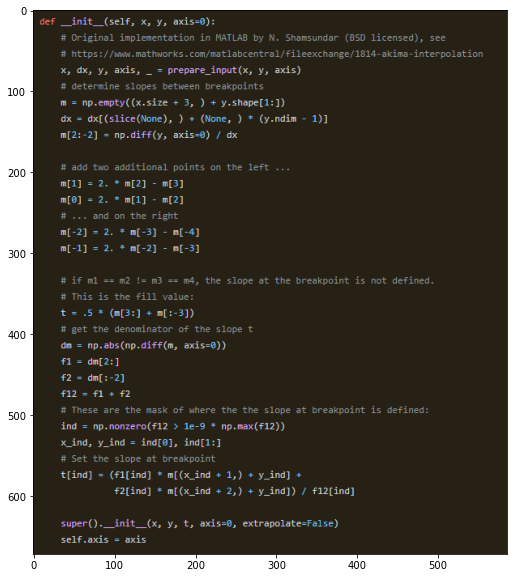

In [22]:
#https://github.com/scipy/scipy/blob/47bb6febaa10658c72962b9615d5d5aa2513fa3a/scipy/interpolate/_cubic.py#L364-L461
img = plt.imread('data/Akima_code.png')
plt.imshow(img)

In [23]:
from numpy.polynomial.polynomial import Polynomial

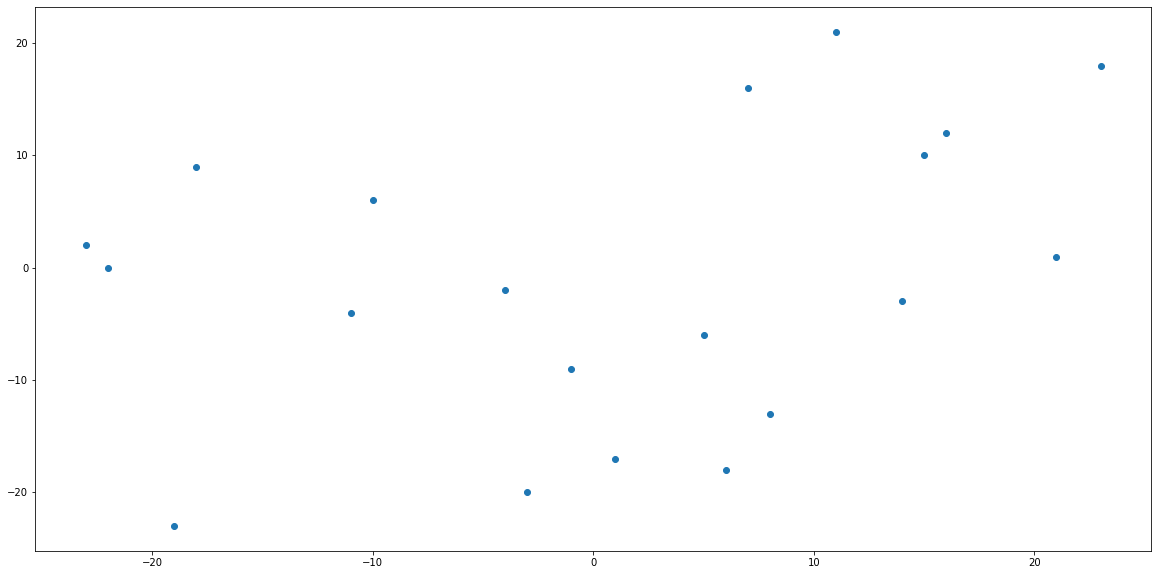

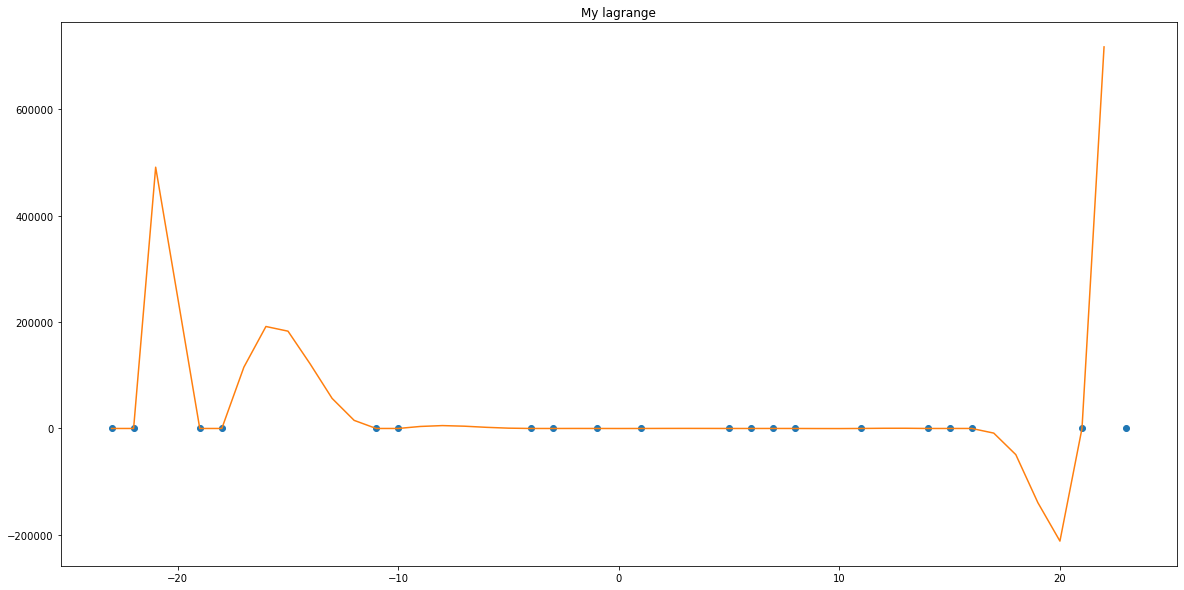

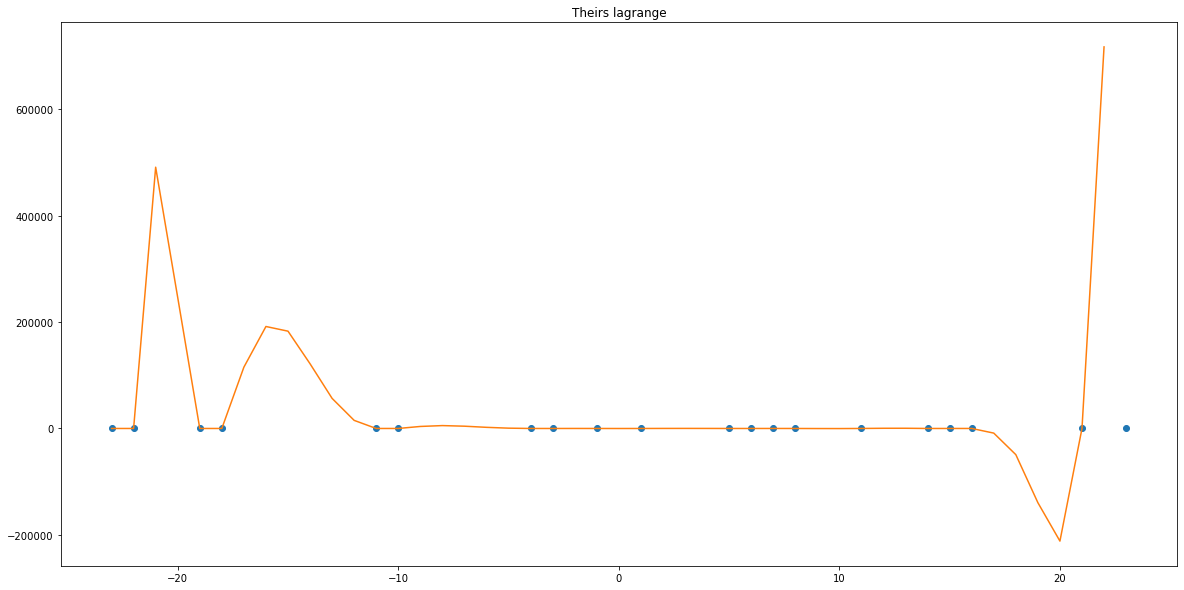

In [24]:
def LaGrange(xs, ys):
    if (xs.size != ys.size):
        raise ValueError("xs and ys arrays must have the same length")
    if (np.any(xs[1:] == xs[:-1])):
        raise ValueError("xs must not contain any duplicates")
    n = xs.size
    p = Polynomial(np.zeros(n))
    for i in range(n):
        q = Polynomial([1])
        for j in range(n):
            if i != j:
                q *= ([-xs[j], 1.]) / (xs[i] - xs[j])
        p += ys[i] * q
    return p

plt.scatter(xs, ys); plt.show()
my_poly = LaGrange(xs, ys)
his_poly = Polynomial(scp_intrp.lagrange(xs, ys).coef[::-1])

lagrange_xs = np.arange(xs.min(), xs.max())
plt.plot(xs, ys_sorted, 'o', lagrange_xs, my_poly(lagrange_xs), '-')
plt.title('My lagrange'); plt.show()
plt.plot(xs, ys_sorted, 'o', lagrange_xs, his_poly(lagrange_xs), '-')
plt.title('Theirs lagrange'); plt.show()

# 3. Быстрая гистограмма

Иногда хочется получить дискретное распределение из N колонок. Но пока что для этого у нас есть только plt.hist(), которая тратит много времени на отрисовку графика. Вам предлагается реализовать свою функцию построения дискретного распределения

1. Алгоритм должен получать на вход список чисел и количество колонок гистограммы. Возвращать нужно значения столбцов (ось абсцисс гистограммы) и количество значений, принадлежащее столбцу (ось ординат гистограммы). Пример с использованием plt показан ниже, сигнатура функции также показана ниже
1. Изучите функцию [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Это такая же гистограмма как plt.hist, но в отличие от hist требуется явно указывать высоту колонок и их название
1. С помощью результатов своего алгоритма и plt.bar постройте гистограмму по массиву из 50+ случайных чисел. Графики plt.bar по вашему алгоритму и plt.hist() должны совпадать, что подтвердит корректность работы вашего алгоритма
1. Сравните скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. В jupyter рекомендуется использовать built-in magic commands, а именно timeit. Но можно обойтись и ручными измерениями времени выполнения

Значения колонок: [3. 2. 2. 2.]
Названия колонок: [1.   1.75 2.5  3.25 4.  ]


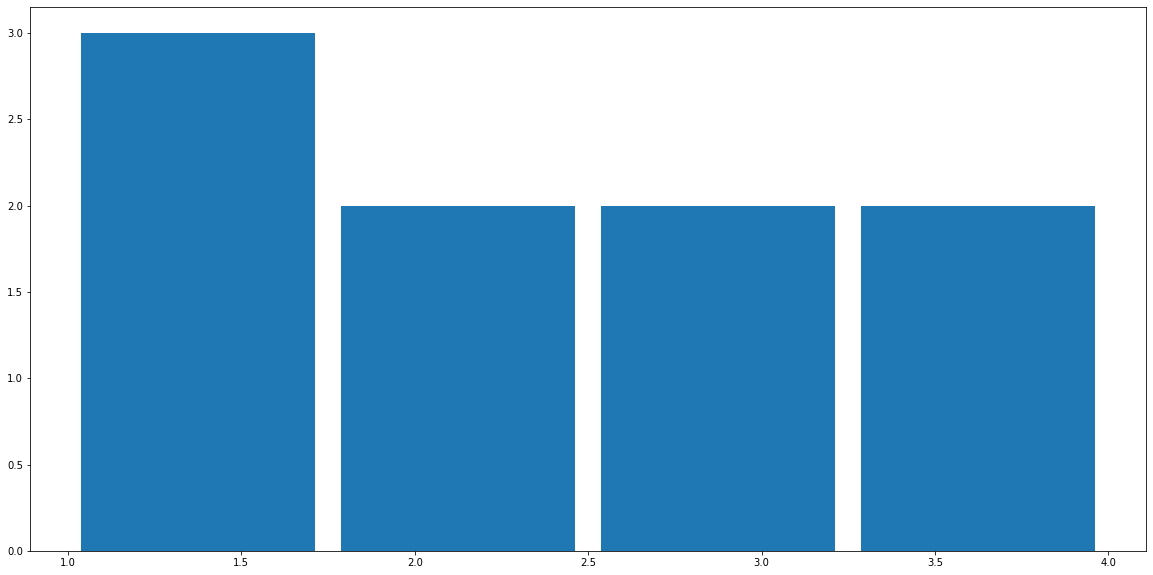

In [25]:
# Пример гистограммы с помощью plt.hist()
# import matplotlib.pyplot as plt

array = [1,1,2,3,4,1,2,3,4]

value_counts, bins_names, visual_figure = plt.hist(array, 
                                                   bins=len(set(array)), 
                                                   rwidth=0.9)
# Параметр rwidth и визуализацию в своей функции реализовывать не требуется
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

In [39]:
from typing import List, Tuple, Union

def fast_hist(array: List[Union[int, float]], 
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists: 
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    if (bins <= 0):
        raise ValueError("Number of bins must be positive")
    array = np.array(array)
    min_val = array.min()
    max_val = array.max()
    if (max_val == min_val):
        max_val += 1
        min_val -= 1
    step = (max_val - min_val) / bins     
    bins_ids = ((array - min_val) / step).astype(int)
    bins_ids[bins_ids == bins] -= 1
    bins_cnts = np.zeros(bins)
    uniques = np.unique(bins_ids, return_counts = True)
    bins_cnts[uniques[0]] += uniques[1]
    bins_names = np.linspace(min_val, max_val, num = bins + 1)
    return (bins_cnts, bins_names)

[0. 0. 3. 0.]
[10.  10.5 11.  11.5 12. ]


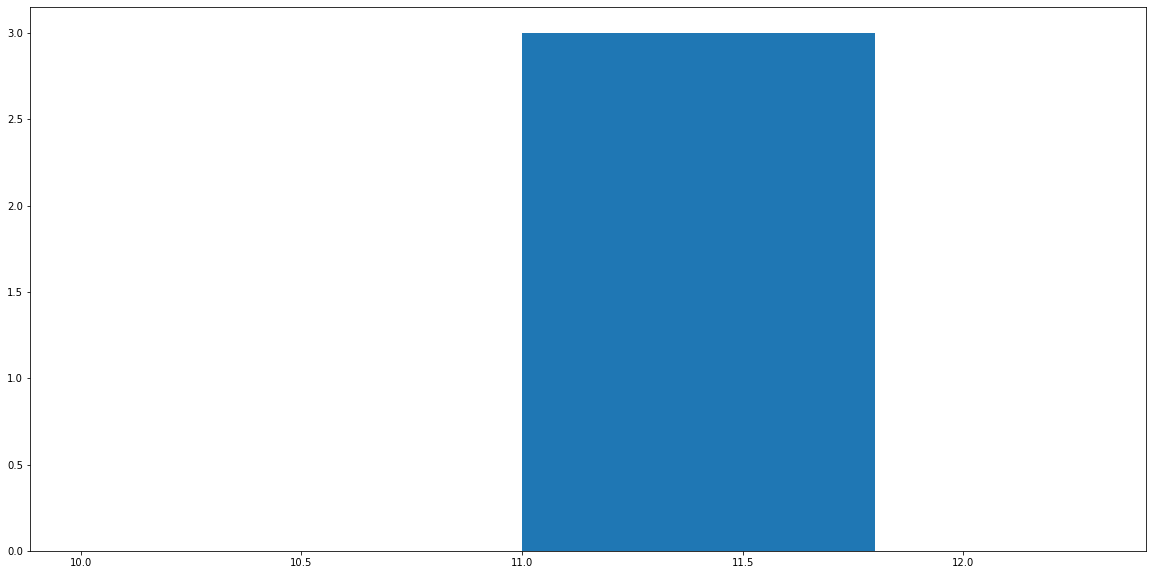

(array([0., 0., 3., 0.]),
 array([10.5 , 10.75, 11.  , 11.25, 11.5 ]),
 <BarContainer object of 4 artists>)

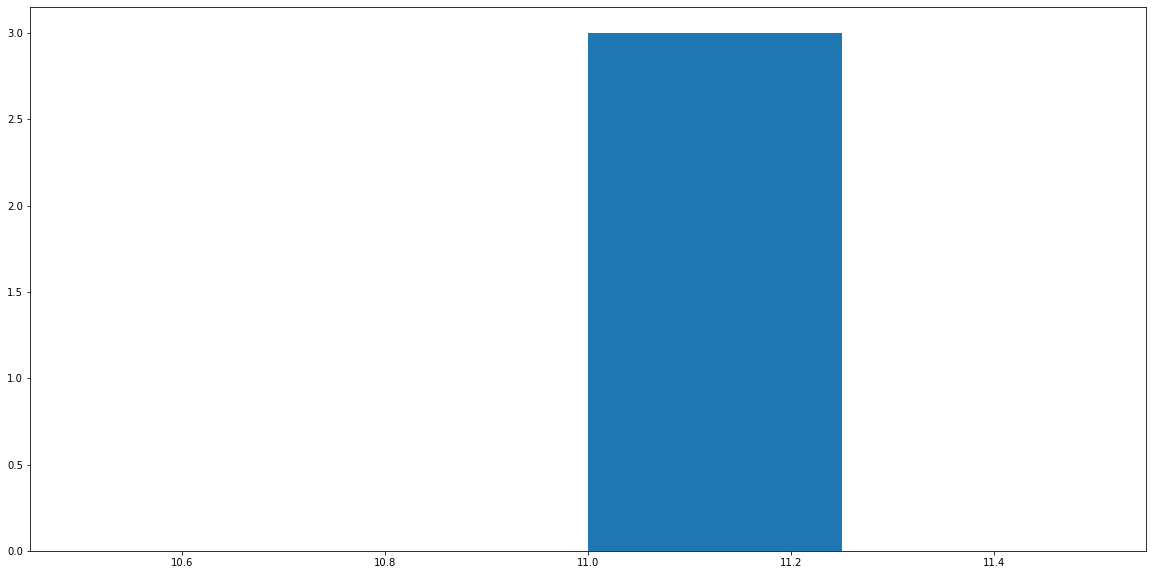

In [40]:
array = [11, 11, 11]
heights, bars = fast_hist(array, 4)
print(heights)
print(bars)
plt.bar(bars[:-1], heights, align = 'edge'); plt.show()
plt.hist(array, 4)

In [28]:
test_array = rng.integers(50, size = 100)
bins = len(set(test_array))

def check_fast_hist():
    heights, bars = fast_hist(test_array, bins)
    #plt.bar(bars[:-1], heights, align = 'edge')

def check_plt_hist():
    plt.hist(test_array, bins, width = 0.8)

In [29]:
%timeit -r 4 check_fast_hist()

235 µs ± 36.4 µs per loop (mean ± std. dev. of 4 runs, 1000 loops each)


34.5 ms ± 10.8 ms per loop (mean ± std. dev. of 4 runs, 10 loops each)


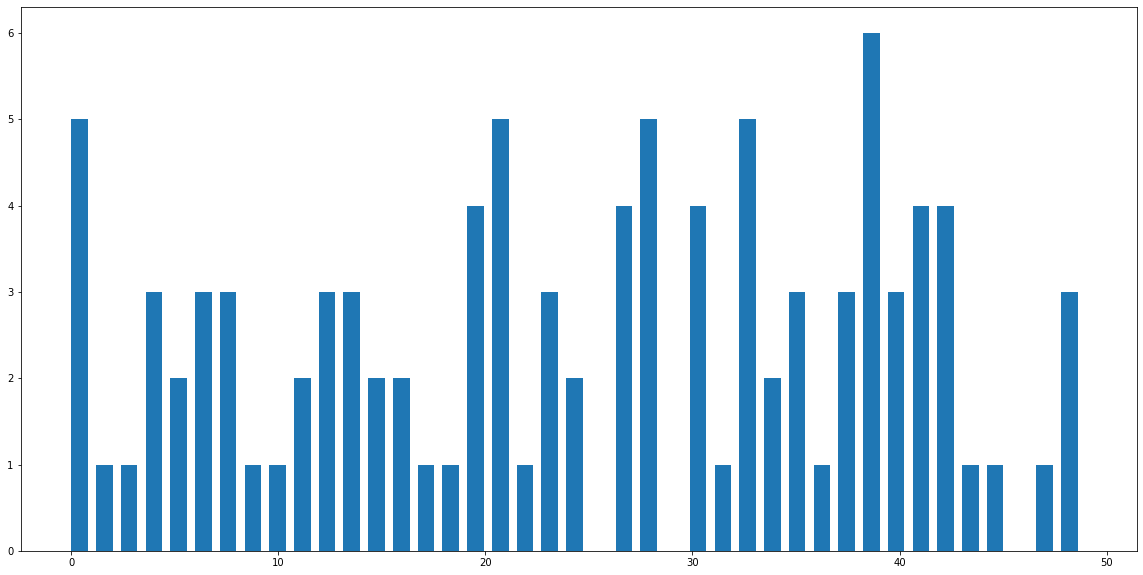

In [30]:
%timeit -r 4 check_plt_hist()